## Data Harga Rumah di Boston

### Pada case ini akan dicari tentang :
#### 1. Perbandingan antara "Price" dengan "Square Living"
#### 2. Korelasi antara "Price" dengan "Square Living"
#### 3. Prediksi "Price" berdasarkan value "Square Living"

## 1. Penjabaran Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats


%matplotlib inline



#Importing DataSet 
dataset = pd.read_csv("house_data.csv")

dataset.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2. Perbandingan antara "Price" dengan "Square Living"

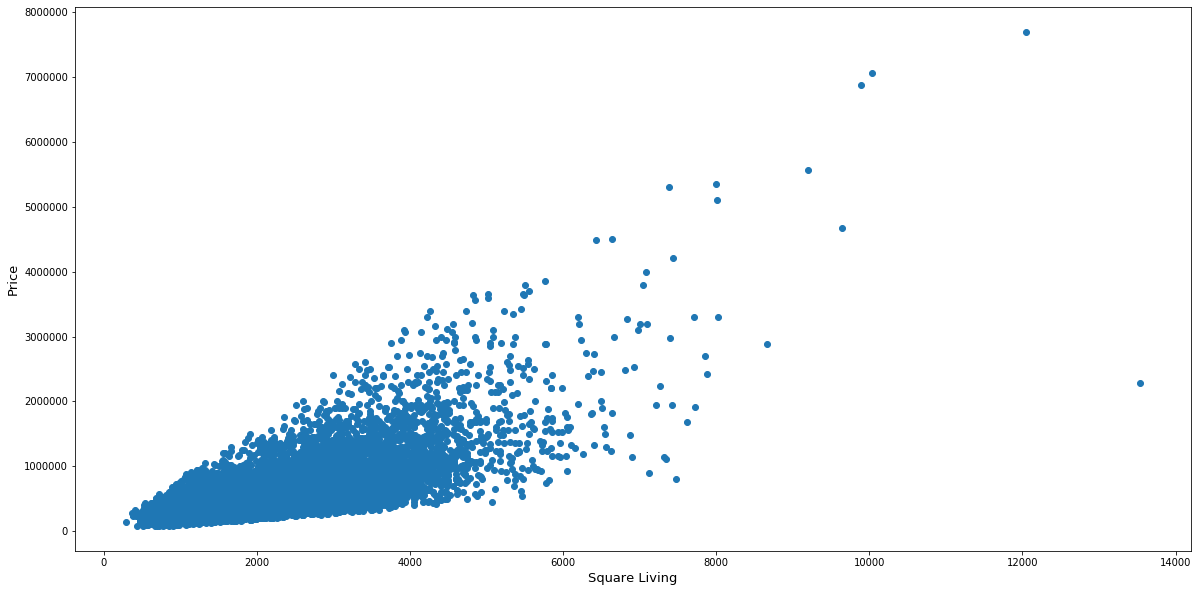

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x = dataset['sqft_living'], y = dataset['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Square Living', fontsize=13)
plt.show()

## 3. Korelasi antara "Price" dengan "Square Living"

In [6]:
import seaborn as sns

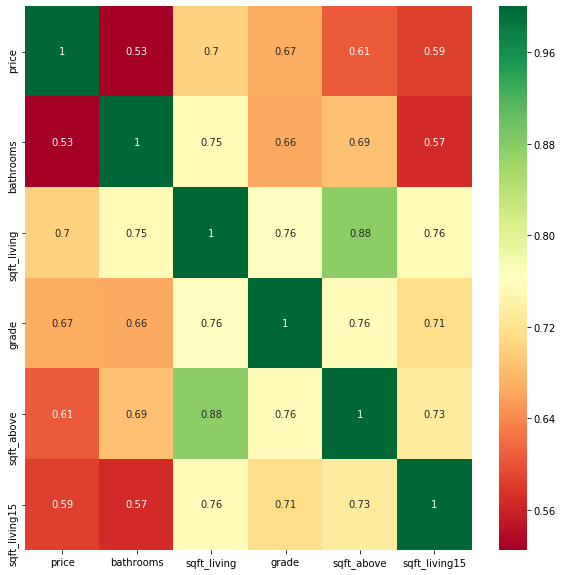

In [7]:
# most correlated features
corrdata = dataset.corr()
top_corr_features = corrdata.index[abs(corrdata["price"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
x = dataset['sqft_living']
y = dataset['price']

fit = np.polyfit(x, y, deg=1)

fit

array([   280.6235679 , -43580.74309447])

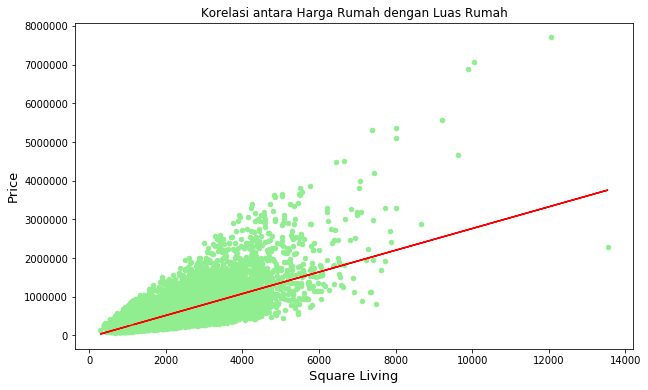

In [9]:
dataset.plot(kind = 'scatter', x = 'sqft_living', y = 'price', figsize =(10,6), color ='lightgreen')

plt.title('Korelasi antara Harga Rumah dengan Luas Rumah')
plt.ylabel('Price', fontsize=13)
plt.xlabel('Square Living', fontsize=13)

plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()


In [10]:
np.corrcoef(x, y)

array([[1.        , 0.70203505],
       [0.70203505, 1.        ]])

## 4. Prediksi "Price" berdasarkan value "Square Living"

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('house_data.csv', usecols=['sqft_living', 'price'])
df.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
price          21613 non-null float64
sqft_living    21613 non-null int64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


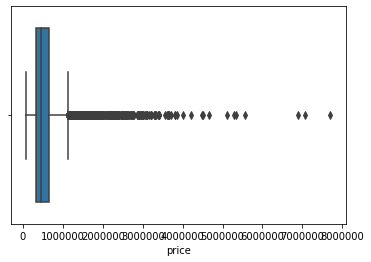

In [14]:
sns.boxplot(x=df['price'])

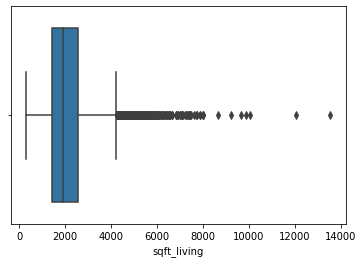

In [15]:
sns.boxplot(x=df['sqft_living'])

### 4.1 Pembersihan data dari data outlier

In [16]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.86671733 0.97983502]
 [0.00568792 0.53363434]
 [0.98084935 1.42625404]
 ...
 [0.37586519 1.15404732]
 [0.38158814 0.52252773]
 [0.58588173 1.15404732]]


In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price          323050.0
sqft_living      1123.0
dtype: float64


In [18]:
df.shape

(21613, 2)

In [19]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(20292, 2)

In [20]:
x_1 = df_out['sqft_living']
y_1 = df_out['price']

fit = np.polyfit(x_1, y_1, deg=1)

fit

array([   171.51740981, 138940.13418397])

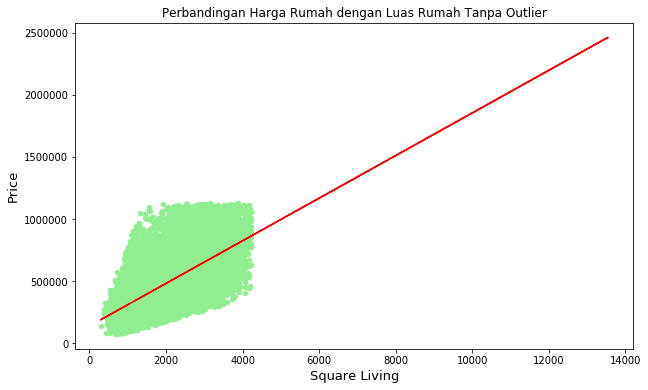

In [21]:
df_out.plot(kind = 'scatter', x = 'sqft_living', y = 'price', figsize =(10,6), color ='lightgreen')

plt.title('Perbandingan Harga Rumah dengan Luas Rumah Tanpa Outlier')
plt.ylabel('Price', fontsize=13)
plt.xlabel('Square Living', fontsize=13)

plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()

### 4.2 Prediksi Harga berdasarkan Luas Rumah

In [22]:
space=df_out['sqft_living']
price=df_out['price']

x = np.array(space).reshape(-1, 1)
y = np.array(price)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
x_train.shape

(16233, 1)

In [25]:
x_test.shape

(4059, 1)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[170.77129747]
141025.5426188974


In [28]:
lin_reg.score(x_test, y_test)

0.38432466287749256

Text(0.5, 1.0, 'Plot Square Living vs Price')

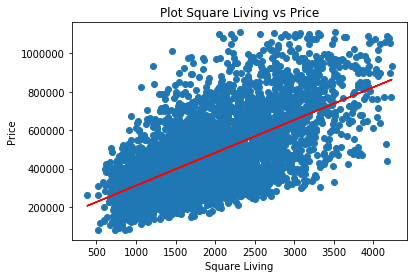

In [29]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Square Living')
plt.ylabel('Price')
plt.title('Plot Square Living vs Price')

In [30]:
lin_reg.predict([[12100]])

array([2207358.24204222])

In [31]:
lin_reg.predict([[20000]])

array([3556451.49207893])

In [32]:
lin_reg.predict([[100]])

array([158102.6723662])

## 5. Kesimpulan

### * Ada korelasi positif antara 'price' dengan 'square living'
### * Dengan menggunakan Regresi Linier dapat diprediksi value 'price' berdasarkan value 'square living'